In [167]:
import pandas as pd

# Load the data to see what it looks like
df = pd.read_csv('/Users/michael/Desktop/SpringData2024-main/data/regression/final_all_entries_filtered_counties_parishes.csv')
df.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,...,x2017,x2018,x2019,x2020,x2021,x2022,x2023,State,Cluster,area_type
0,county,22025,"Catahoula Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,57.49,53.98,54.48,52.31,NaN,NaN,LA,1.0,rural
1,county,22071,"Orleans Parish, Louisiana",co2limits,NaN,NaN,NaN,NaN,68.0,NaN,...,NaN,79.12,77.10,77.45,75.54,NaN,NaN,LA,1.0,urban
2,county,28049,"Hinds County, Mississippi",co2limits,NaN,NaN,NaN,NaN,58.0,NaN,...,NaN,72.37,68.94,69.36,69.18,NaN,NaN,MS,1.0,urban
3,county,28055,"Issaquena County, Mississippi",co2limits,NaN,NaN,NaN,NaN,55.0,NaN,...,NaN,63.40,60.60,60.13,59.33,NaN,NaN,MS,1.0,rural
4,county,41051,"Multnomah County, Oregon",co2limits,NaN,NaN,NaN,NaN,76.0,NaN,...,NaN,77.96,76.33,76.65,76.12,NaN,NaN,OR,2.0,urban


In [168]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_values_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_values_percentage
})

missing_values_summary.sort_values(by="Percentage", ascending=False)

,Missing Values,Percentage
x2010,24,100.0
x2011,24,100.0
x2012,24,100.0
x2013,24,100.0
x2015,24,100.0
x2017,24,100.0
x2016,12,50.0
x2014,12,50.0
x2023,12,50.0
x2022,12,50.0


In [169]:
# Check the unique values in the 'varname' column to identify categories related to "oil" and "drill"
unique_varnames = df['varname'].unique()
unique_varnames

array(['co2limits', 'drilloffshore'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['x2010' 'x2011' 'x2012' 'x2013' 'x2014' 'x2015' 'x2016' 'x2017']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


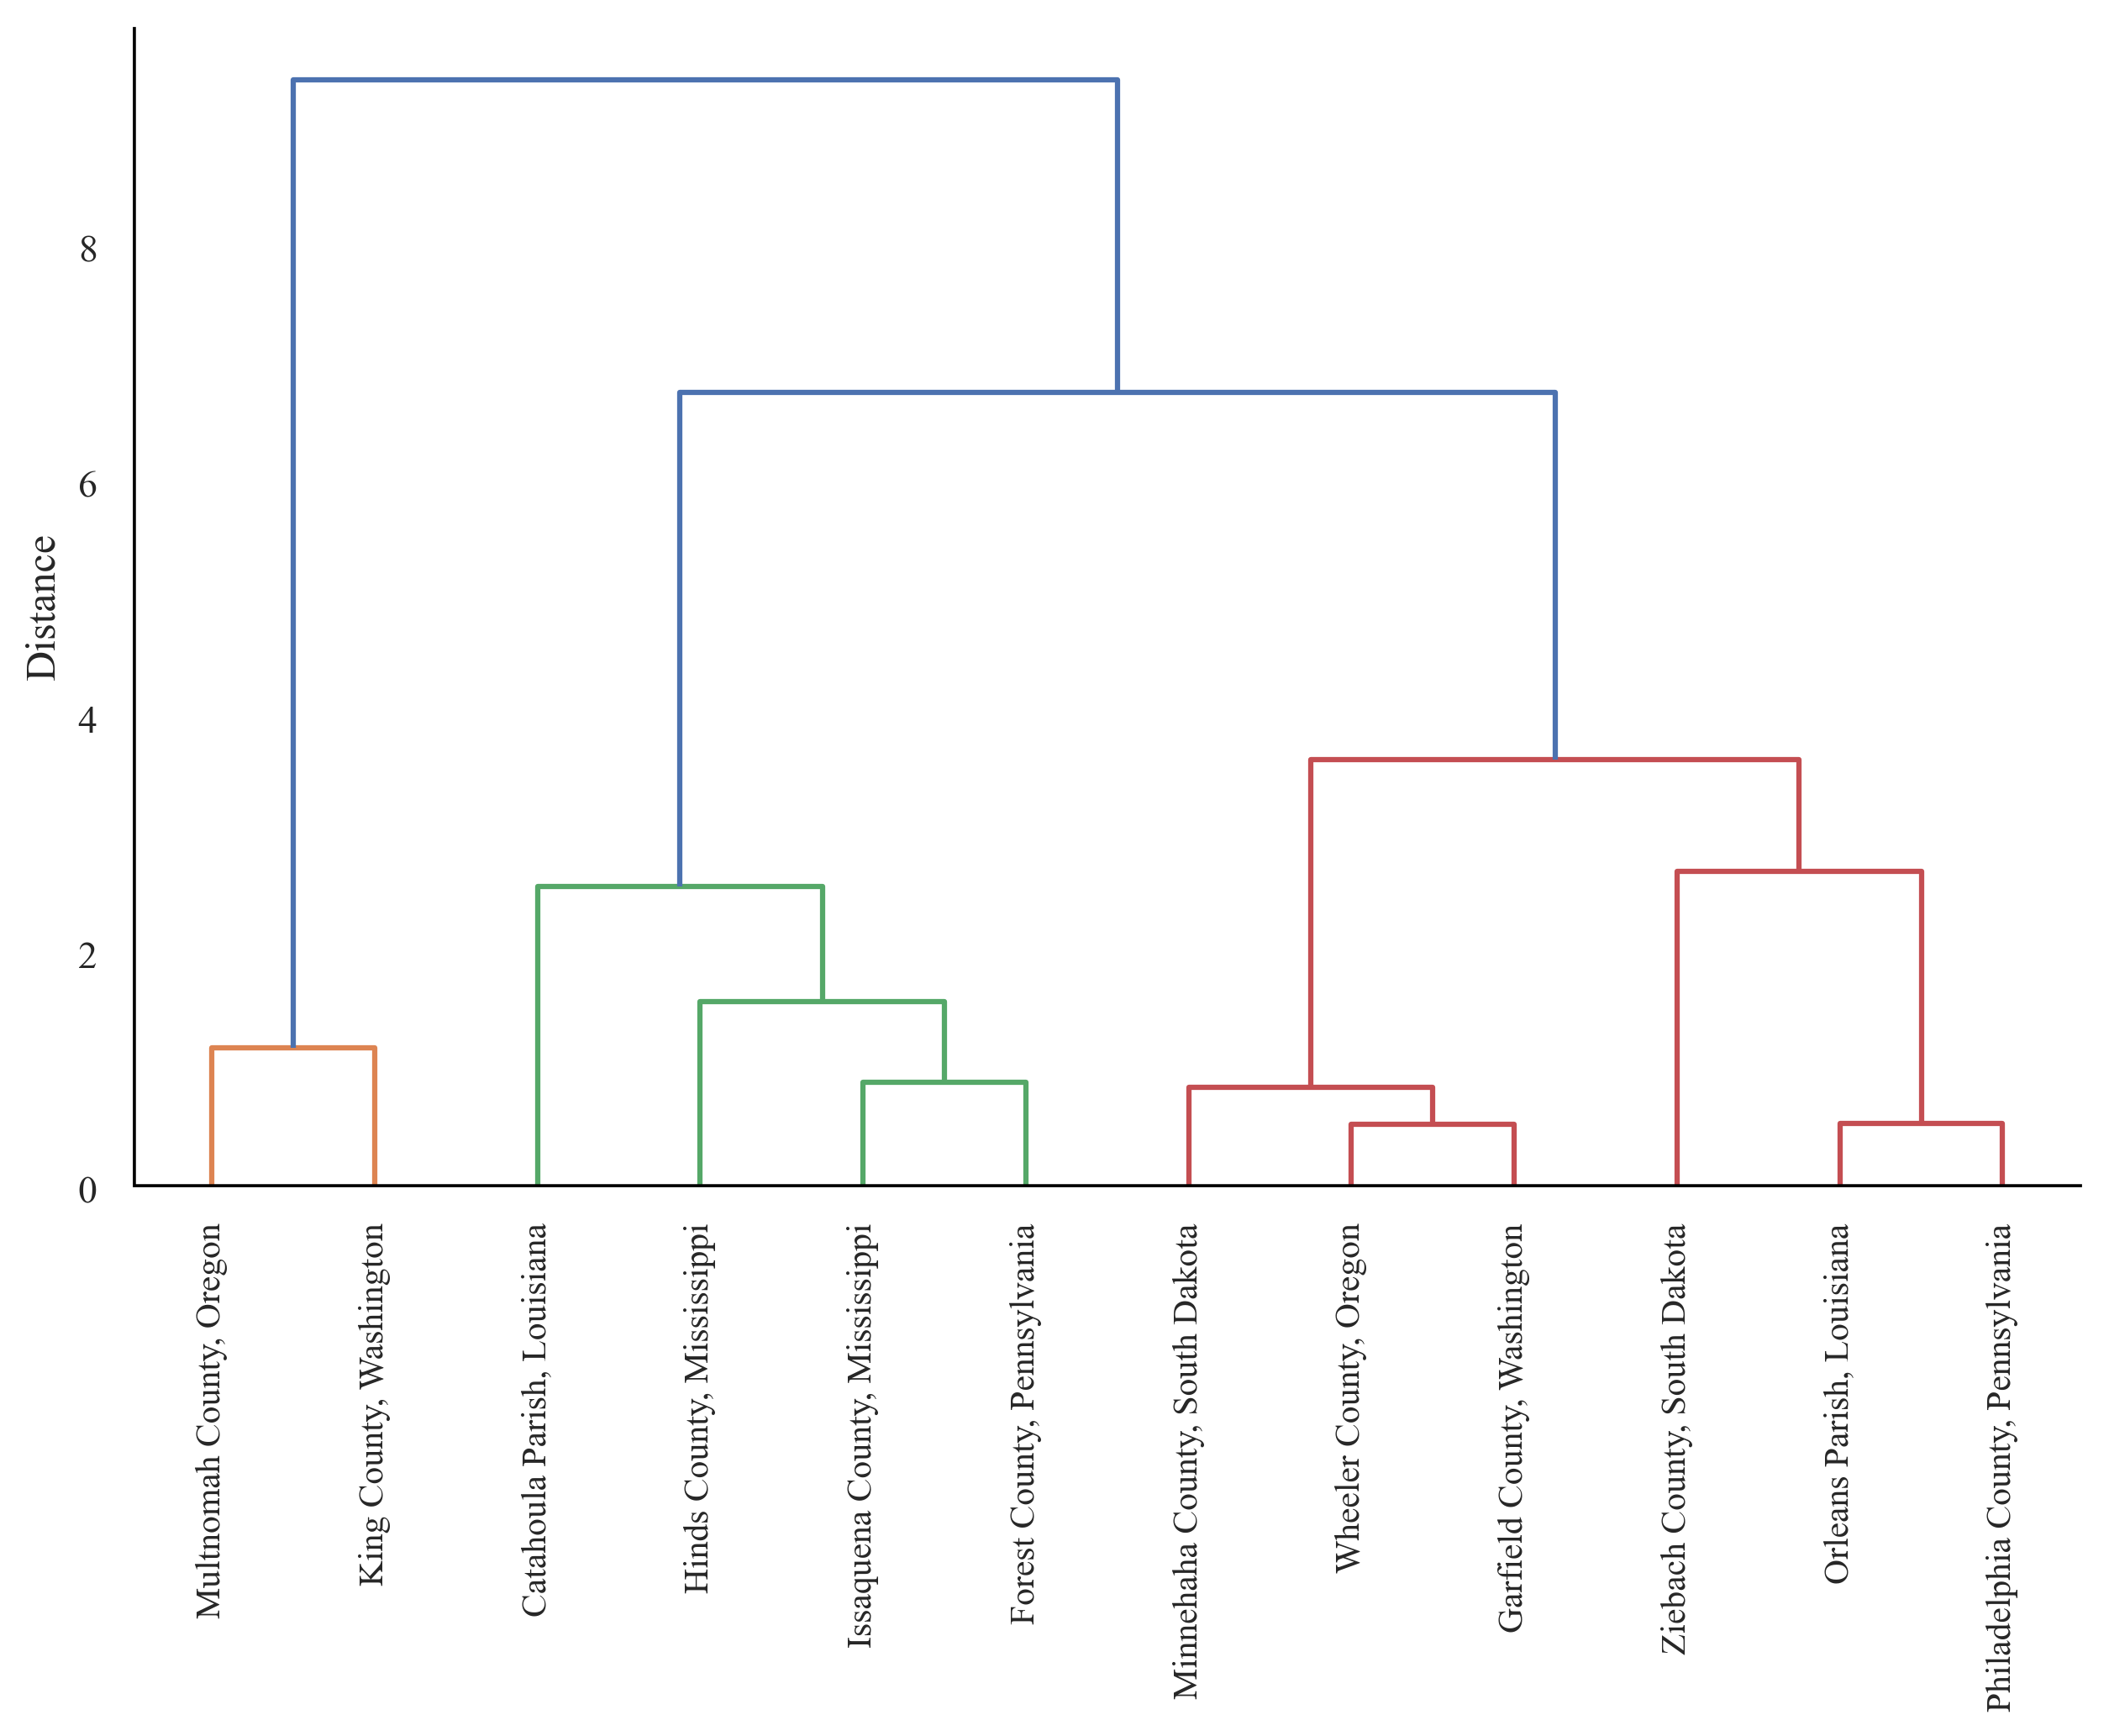

In [170]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Data Filtering - Select entries with 'varname' as 'drilloffshore'
drill_data = df[df['varname'] == 'drilloffshore']

# Step 2: Data Preparation
# Remove columns with 100% missing values and non-numeric columns
drill_data_cleaned = drill_data.drop(columns=['geotype', 'geoid', 'geoname', 'varname', 'State', 'area_type'])

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
drill_data_imputed = imputer.fit_transform(drill_data_cleaned)

# Standardize the data
scaler = StandardScaler()
drill_data_standardized = scaler.fit_transform(drill_data_imputed)

# Perform hierarchical clustering
Z_drill = linkage(drill_data_standardized, 'ward')

# Plot the dendrogram with a white background and 300 DPI
plt.figure(figsize=(10, 6), facecolor='white', dpi=300)
# plt.title('Dendrogram for Drilloffshore')
dendrogram(Z_drill, labels=drill_data['geoname'].values, leaf_rotation=90, leaf_font_size=10)

# Add horizontal and vertical axis lines
plt.axhline(color='black', linewidth=3)
plt.axvline(color='black', linewidth=3)

# plt.xlabel('Counties/Parishes')
plt.ylabel('Distance')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['x2010' 'x2011' 'x2012' 'x2013' 'x2015' 'x2017' 'x2022' 'x2023']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


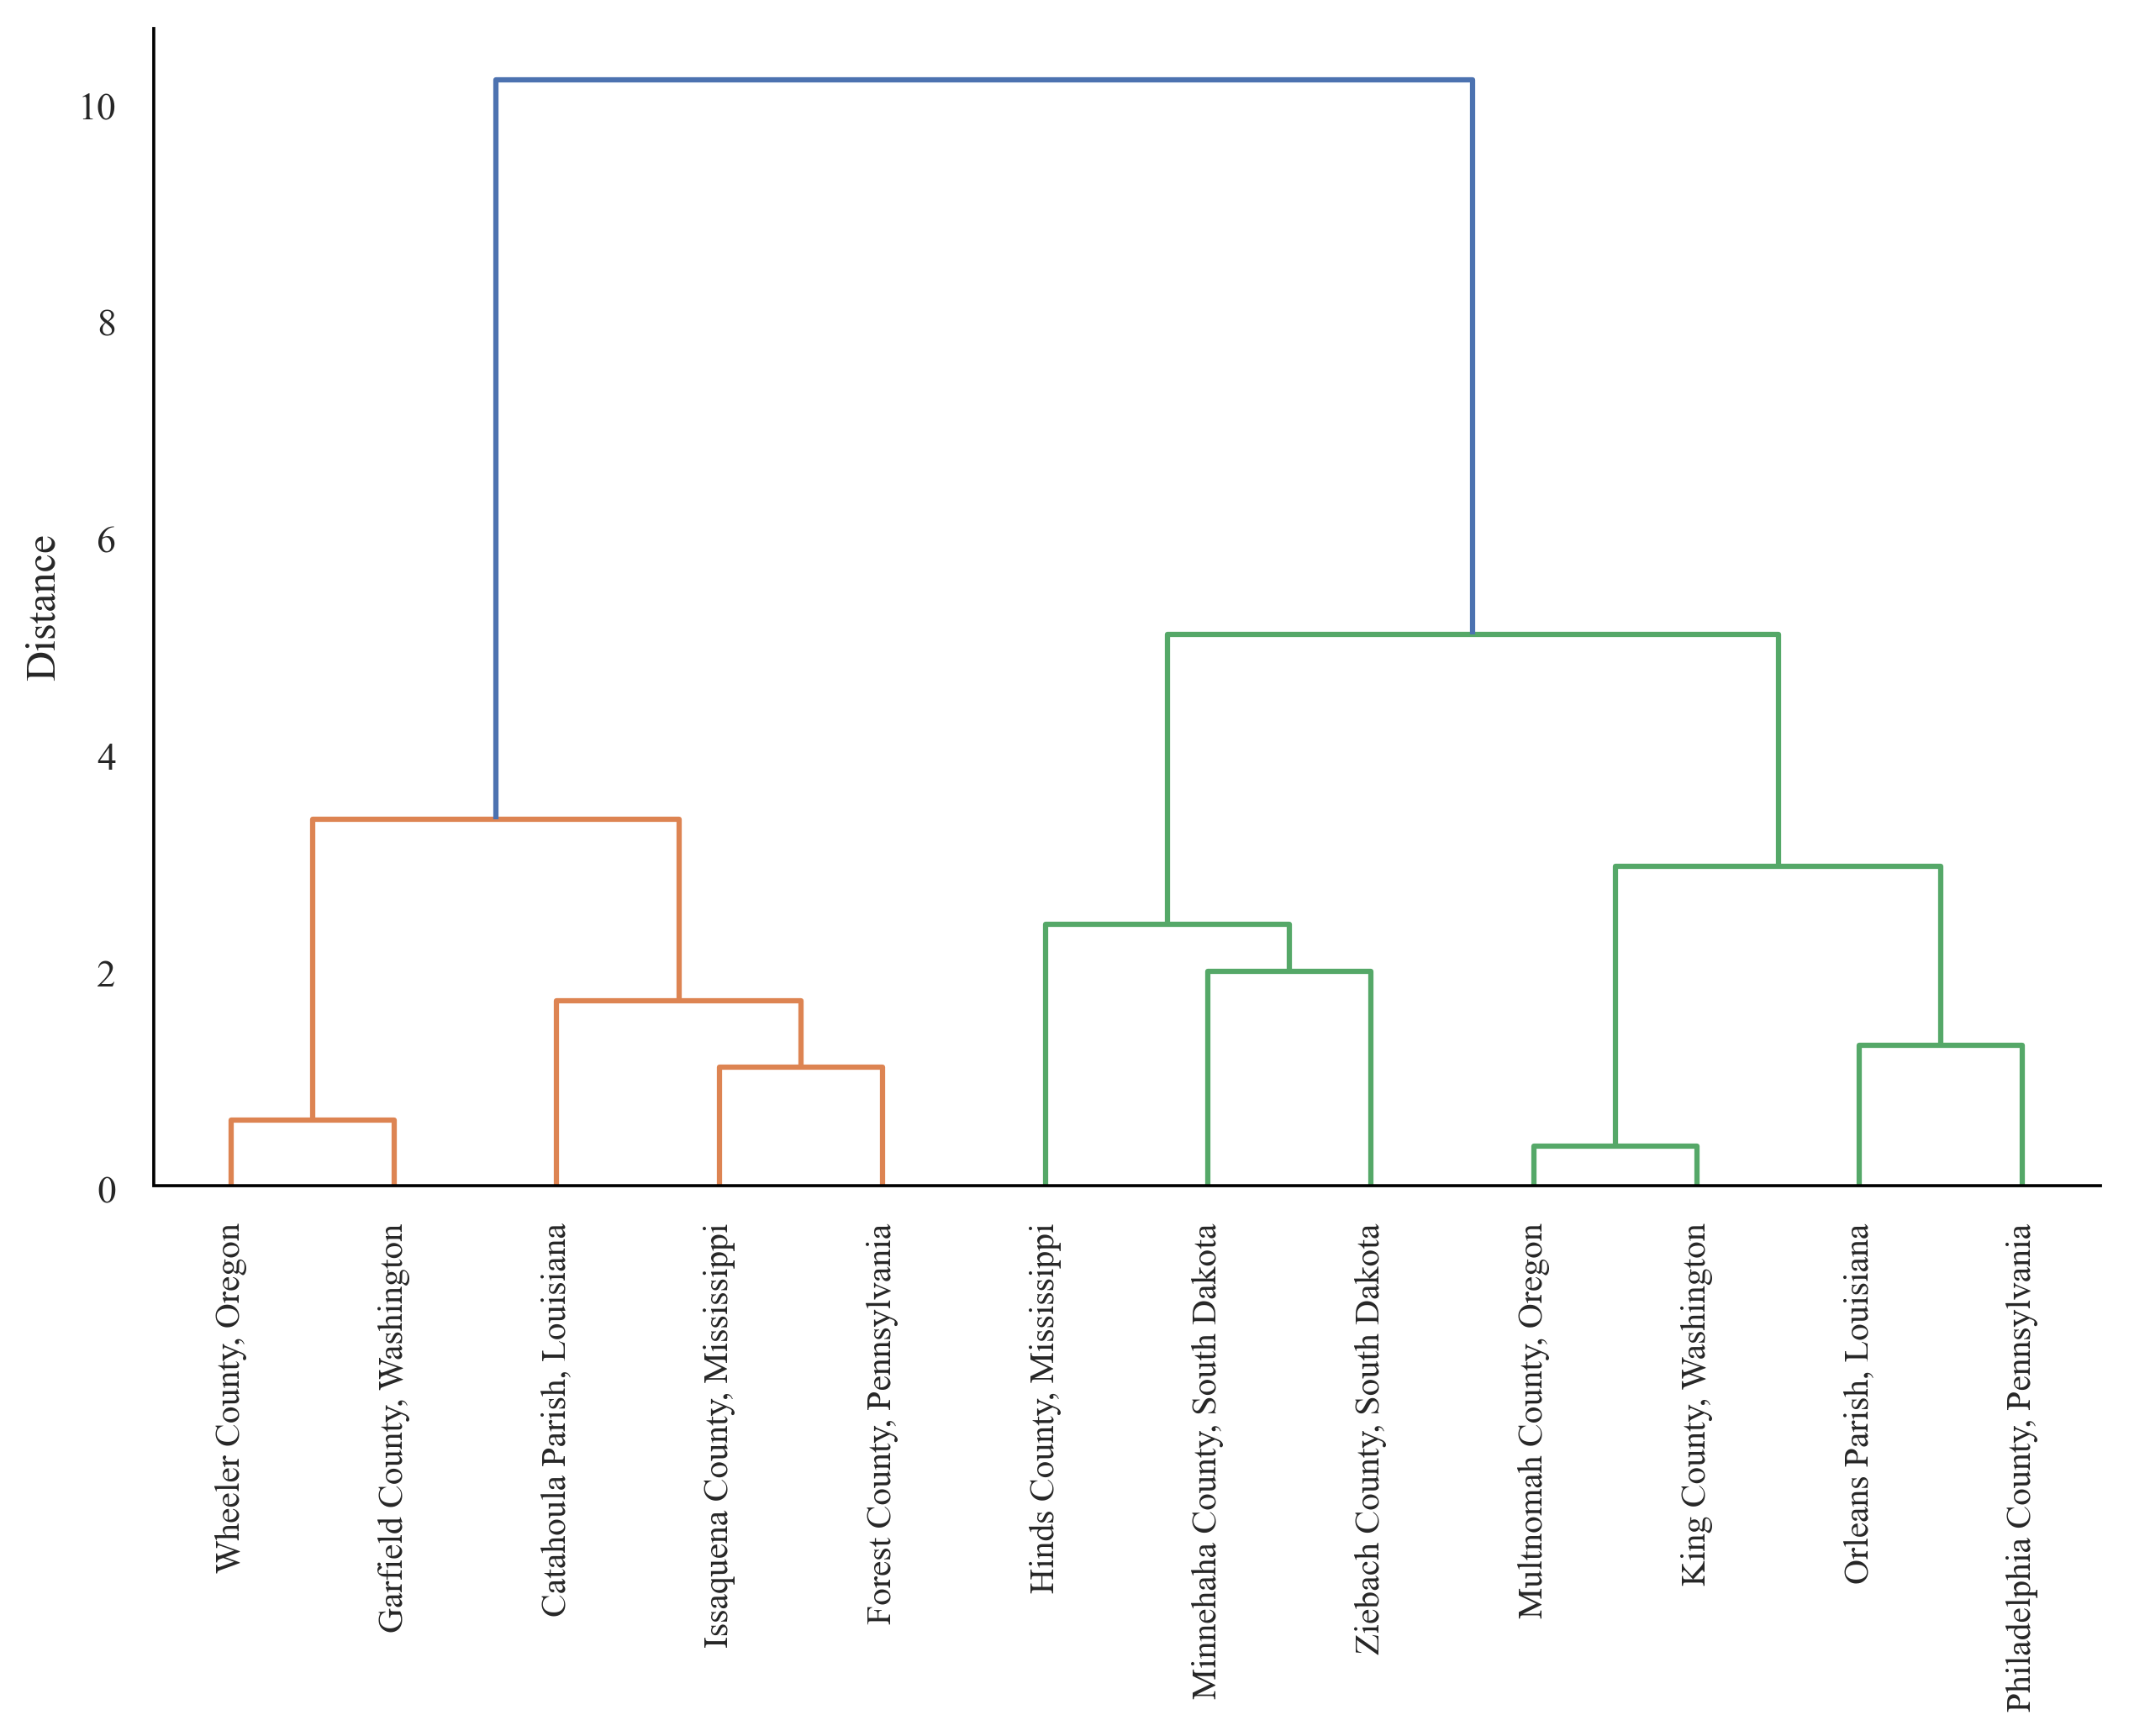

In [171]:
# Step 1: Data Filtering - Select entries with 'varname' as 'co2limits'
co2_data = df[df['varname'] == 'co2limits']

# Step 2: Data Preparation
# Remove columns with 100% missing values and non-numeric columns
co2_data_cleaned = co2_data.drop(columns=['geotype', 'geoid', 'geoname', 'varname', 'State', 'area_type'])

# Impute missing values with the mean of the column
co2_data_imputed = imputer.fit_transform(co2_data_cleaned)

# Standardize the data
co2_data_standardized = scaler.fit_transform(co2_data_imputed)

# Perform hierarchical clustering
Z_co2 = linkage(co2_data_standardized, 'ward')

# Plot the dendrogram with 300 DPI
plt.figure(figsize=(10, 6), dpi=300)
# plt.title('Dendrogram for CO2 Limits')
dendrogram(Z_co2, labels=co2_data['geoname'].values, leaf_rotation=90, leaf_font_size=10)

# Add horizontal and vertical axis lines
plt.axhline(color='black', linewidth=3)
plt.axvline(color='black', linewidth=3)

# plt.xlabel('Counties/Parishes')
plt.ylabel('Distance')
plt.show()